Элементарные физические процессы. Практикум №2

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import poisson

Приведение таблицы в человеческий вид

In [45]:
df = pd.read_excel("data/elementary.xlsx")
df = df.rename(columns={
    "Номер кадра": "shot_number",
    "кол-во первичных": "init_amount",
    "номер события": "event_number",
    "множесвтенность события": "amount",
    "примечания": "info"
})

In [46]:
df = df.fillna(-1)
Np = []
Npd = []

for i in range(len(df)):
    if df["init_amount"][i] == -1:
        df["init_amount"][i] = df["init_amount"][i - 1]
        df["shot_number"][i] = df["shot_number"][i - 1]
        Npd[-1] += 1
    else:
        Np.append(df["init_amount"][i])
        Npd.append(1)

C:\Users\krech\AppData\Local\Temp\ipykernel_5084\3247297409.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["init_amount"][i] = df["init_amount"][i - 1]
C:\Users\krech\AppData\Local\Temp\ipykernel_5084\3247297409.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["shot_number"][i] = df["shot_number"][i - 1]


Обработка. Упражнение 1

In [47]:
def sigm(Np, Npd):
    ro = 0.13 #g/cm^3
    A = 2.016 #
    Na = 6.0247 * pow(10, 23) #
    L = 165 # сm
    return A * np.log(Np / (Np-Npd)) / (ro * Na * L)

In [48]:
# different types of interactions
df["info"].value_counts()

Рр                     46
Рн                     34
Рд                     17
-1                     16
Спектатор              15
Pp                     15
Pн                      8
Спектатор рн            8
Pn                      4
Pd                      4
спектатор               3
Спектатор рр            2
Рн?                     1
Спектатор рд            1
Спектатор рр типа??     1
Спектатор, рн           1
Рн и спектатор          1
Pд                      1
pd                      1
Спектатор , рн          1
Спектатор Рн            1
Name: info, dtype: int64

In [49]:
# multiplicity
new_df = pd.DataFrame(columns=["n+-", "<n+->"], index=np.arange(-1, 11))
new_df["n+-"] = df["множественность события"].value_counts().sort_index().values
new_df["<n+->"] = np.sqrt(df["множественность события"].value_counts().sort_index().values)
new_df

,n+-,<n+->
-1,12,3.464102
0,4,2.000000
1,21,4.582576
2,25,5.000000
3,28,5.291503
4,34,5.830952
5,16,4.000000
6,18,4.242641
7,11,3.316625
8,9,3.000000


In [50]:
Np = df["init_amount"].sum()
N_without = df[df["множественность события"] == -1].count() # amount of events without interaction
Npd = df["event_number"].count() - N_without

# adding N_without because each event without interaction decreases amount of secondary particles 
N_neutron = df["event_number"][df["множественность события"] % 2 == 1].count() - 12

print(f"Np = {Np}\nNpd = {Npd[0]}\nN_neutron = {N_neutron}")


Np = 1072.0
Npd = 169
N_neutron = 77


In [51]:
# count average for puasson
avg, avg_ch, avg_nech = 0, 0, 0
for i in range(1, len(new_df["n+-"]) - 1):
    avg += new_df["n+-"][i] * i / 169

for i in range(2, len(new_df["n+-"]) - 1, 2):
    avg_ch += new_df["n+-"][i] * i / 92

for i in range(1, len(new_df["n+-"]) - 1, 2):
    avg_nech += new_df["n+-"][i] * i / 77

avg_nech, avg, avg_ch

(3.5194805194805197, 3.887573964497042, 4.195652173913043)

Text(0.5, 0, 'Множественность')

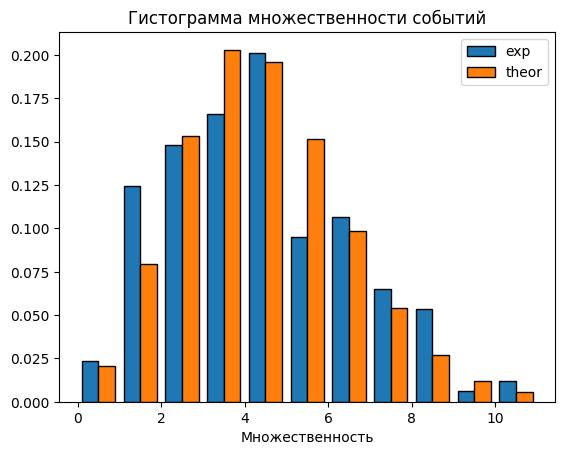

In [52]:
plt.hist([df["множественность события"], poisson.rvs(mu=avg, size=100000)],
         bins=np.arange(12), label=["exp", "theor"], density=True, edgecolor="black")

plt.title("Гистограмма множественности событий")
plt.legend()
plt.xlabel("Множественность")

Text(0.5, 0, 'Множественность')

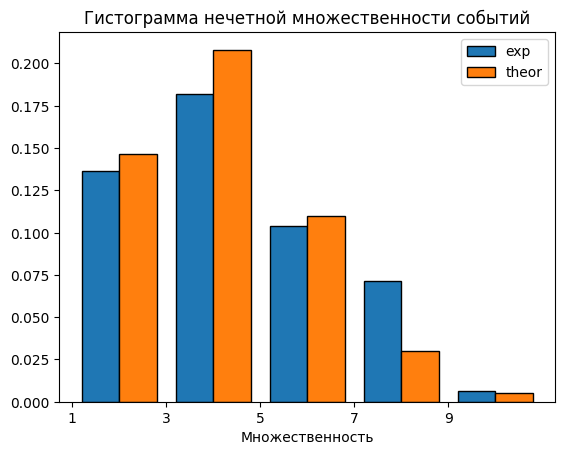

In [64]:
plt.hist([df["множественность события"][df["множественность события"] % 2 == 1], poisson.rvs(mu=avg_nech, size=100000)],
         bins=np.arange(1, 12, 2), label=["exp", "theor"], density=True, edgecolor="black")

plt.title("Гистограмма нечетной множественности событий")
plt.xticks([1, 3, 5, 7, 9])
plt.legend()
plt.xlabel("Множественность")

Text(0.5, 0, 'Множественность')

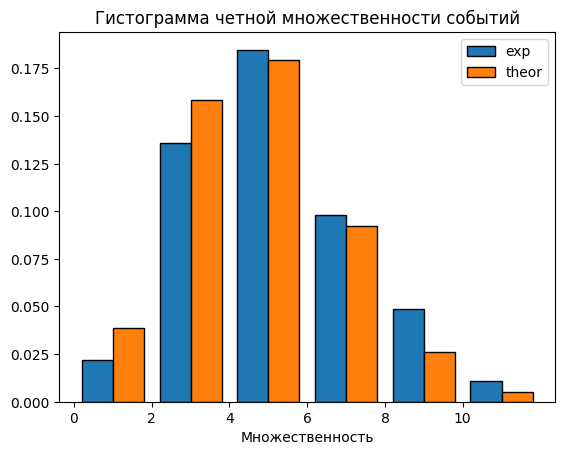

In [65]:
plt.hist([df["множественность события"][df["множественность события"] % 2 == 0], poisson.rvs(mu=avg_ch, size=100000)],
         bins=np.arange(0, 13, 2), label=["exp", "theor"], density=True, edgecolor="black")

plt.title("Гистограмма четной множественности событий")
plt.legend()
plt.xticks([0, 2, 4, 6, 8, 10])
plt.xlabel("Множественность")

In [55]:
# вероятности взаимодействия с дейтерием, вероятность взаимодействия с 
sigm(Np, Npd[0]), sigm(Np, N_neutron) # (2.676336858014878e-26, 1.1628108158776178e-26)

(2.676336858014878e-26, 1.1628108158776178e-26)